In [1]:
from google.colab import files
upload=files.upload()

Saving movies.csv to movies.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('movies.csv')

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.shape

(4803, 24)

In [6]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

**EDA**

In [7]:
# Top 10 Languages with highest movie count
df['original_language'].value_counts().head(10)

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [8]:
# Top 10 Language wise avg poplularity
df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10)

,popularity
original_language,
el,28.858238
ja,25.663788
id,24.586253
en,22.177435
ko,19.488720
it,17.818268
da,17.663925
te,16.254032
es,13.330804


<Axes: xlabel='original_language'>

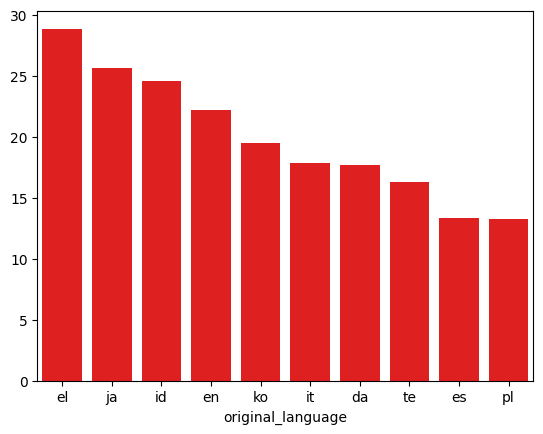

In [9]:
#plot
sns.barplot(x=df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10).index,
            y=df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10).values,color='r')

In [10]:
df['status'].value_counts()

,count
status,
Released,4795
Rumored,5
Post Production,3


In [11]:
# Mean popularity score of directors
df.groupby('director')['popularity'].mean().sort_values(ascending=False).head(10)

,popularity
director,
Kyle Balda,875.581305
Tim Miller,514.569956
Colin Trevorrow,221.947277
Damien Chazelle,192.528841
Christopher Nolan,185.373245
James Gunn,170.210157
Chris Buck,165.125366
Alan Taylor,150.771115
Pierre Coffin,125.372489


In [12]:
# movie with higest revenue
df[df['revenue']==df['revenue'].max()]['original_title']

,original_title
0,Avatar


In [13]:
# movie with highest vote count
df[df['vote_count']==df['vote_count'].max()]['original_title']

,original_title
96,Inception


In [14]:
# movie with highest vote_average
df[df['vote_average']==df['vote_average'].max()]['original_title']

,original_title
3519,Stiff Upper Lips
4045,"Dancer, Texas Pop. 81"
4247,Me You and Five Bucks
4662,Little Big Top


In [15]:
# movie with highest budget
df[df['budget']==df['budget'].max()]['original_title']

,original_title
17,Pirates of the Caribbean: On Stranger Tides


In [16]:
# Avg runtime of each Genre
df.groupby('genres')['runtime'].mean().sort_values(ascending=False).head(10)

,runtime
genres,
Crime Drama Thriller History,338.0
History Documentary Music,225.0
Action Drama History Western,219.0
Adventure Drama History War,216.0
Drama Action Western,191.0
Fantasy Drama Crime,189.0
Drama Foreign History War,185.0
History Romance War,183.0
TV Movie Romance Drama,180.0


In [17]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [18]:
df['genres'].value_counts().head(10)

,count
genres,
Drama,370
Comedy,282
Drama Romance,164
Comedy Romance,144
Comedy Drama,142
Comedy Drama Romance,109
Horror Thriller,88
Documentary,68
Horror,64


In [19]:
# Avg revenue by genre
df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)

,revenue
genres,
Family Fantasy Adventure,1.025491e+09
Drama Action Crime Thriller,1.004558e+09
Family Adventure Drama Fantasy,9.665506e+08
Adventure Fantasy Family Mystery,9.382127e+08
Animation Comedy Adventure Family,8.772448e+08
Drama Comedy Animation Family,8.576112e+08
Action Thriller Science Fiction Mystery Adventure,8.255328e+08
Science Fiction Adventure Family Fantasy,7.929106e+08
Family Animation Drama,7.882418e+08


<Axes: xlabel='genres'>

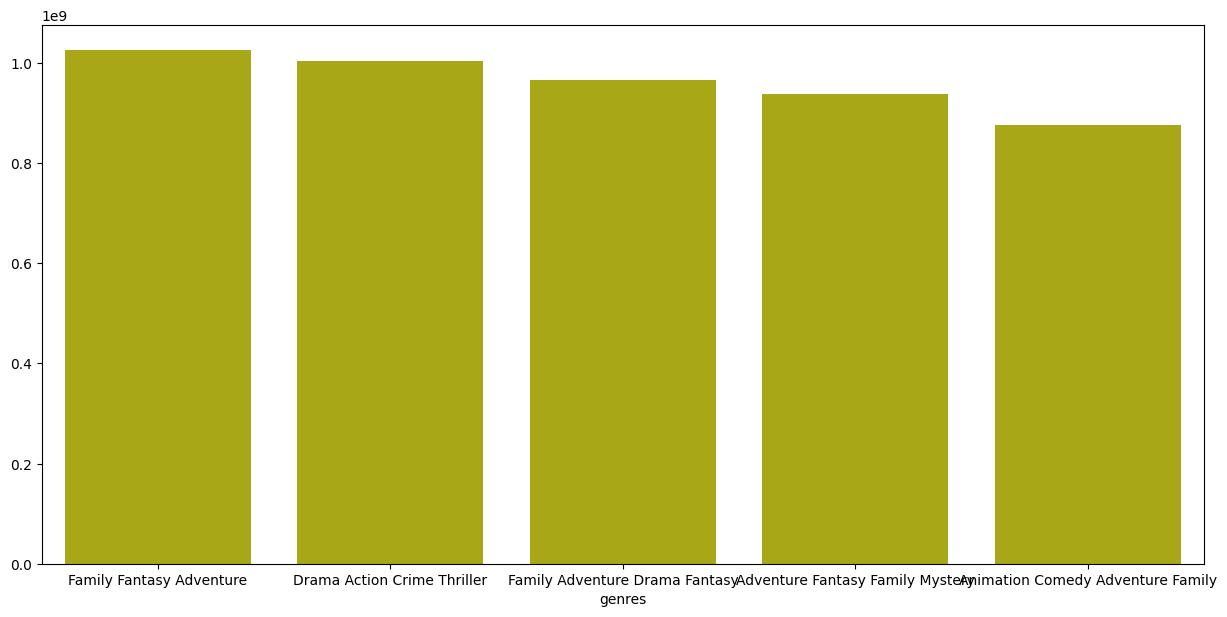

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(5).index,
            y=df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head().values,color='y')

In [21]:
# all info about avatar movie
df[df['original_title']=='Avatar']

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


**MOVIE RECOMMENDATION SYSTEM**

In [47]:
df1=df[['index','original_title','tagline','overview','keywords']]

In [48]:
df1.head()

,index,original_title,tagline,overview,keywords
0,0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",culture clash future space war space colony so...
1,1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",ocean drug abuse exotic island east india trad...
2,2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,spy based on novel secret agent sequel mi6
3,3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,dc comics crime fighter terrorist secret ident...
4,4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",based on novel mars medallion space travel pri...


In [49]:
df1['tagline'] = df1['tagline'].astype(str) + df1['overview'].astype(str) + df1['keywords'].astype(str)

<ipython-input-49-c7a49ff44cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tagline'] = df1['tagline'].astype(str) + df1['overview'].astype(str) + df1['keywords'].astype(str)


In [50]:
df1.head()

,index,original_title,tagline,overview,keywords
0,0,Avatar,Enter the World of Pandora.In the 22nd century...,"In the 22nd century, a paraplegic Marine is di...",culture clash future space war space colony so...
1,1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins....","Captain Barbossa, long believed to be dead, ha...",ocean drug abuse exotic island east india trad...
2,2,Spectre,A Plan No One EscapesA cryptic message from Bo...,A cryptic message from Bond’s past sends him o...,spy based on novel secret agent sequel mi6
3,3,The Dark Knight Rises,The Legend EndsFollowing the death of District...,Following the death of District Attorney Harve...,dc comics crime fighter terrorist secret ident...
4,4,John Carter,"Lost in our world, found in another.John Carte...","John Carter is a war-weary, former military ca...",based on novel mars medallion space travel pri...


In [51]:
df1.drop(['overview','keywords'],axis=1,inplace=True)

<ipython-input-51-3222c4001d48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['overview','keywords'],axis=1,inplace=True)


In [52]:
df1.head()

,index,original_title,tagline
0,0,Avatar,Enter the World of Pandora.In the 22nd century...
1,1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins...."
2,2,Spectre,A Plan No One EscapesA cryptic message from Bo...
3,3,The Dark Knight Rises,The Legend EndsFollowing the death of District...
4,4,John Carter,"Lost in our world, found in another.John Carte..."


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000, stop_words='english')

In [54]:
cv
CountVectorizer(max_features=10000, stop_words='english')
vector=cv.fit_transform(df1['tagline'].values.astype('U')).toarray()

In [55]:
vector.shape

(4803, 10000)

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
similarity

array([[1.        , 0.03390318, 0.        , ..., 0.0255655 , 0.        ,
        0.        ],
       [0.03390318, 1.        , 0.        , ..., 0.07800765, 0.02652791,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.02401461, 0.        ,
        0.        ],
       ...,
       [0.0255655 , 0.07800765, 0.02401461, ..., 1.        , 0.060012  ,
        0.04129201],
       [0.        , 0.02652791, 0.        , ..., 0.060012  , 1.        ,
        0.06318941],
       [0.        , 0.        , 0.        , ..., 0.04129201, 0.06318941,
        1.        ]])

In [61]:
df1[df1['original_title']=="Iron Man"].index[0]

68

In [62]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(df1.iloc[i[0]].original_title)

Spectre
Never Say Never Again
Die Another Day
Diamonds Are Forever
Quantum of Solace


In [83]:
def recommand(movies):
    index=df1[df1['original_title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:10]:
        # Access the 'original_title' column instead of 'title'
        print(df1.iloc[i[0]]['original_title'])

In [84]:
recommand("Avatar")

Avatar
Moonraker
Lifeforce
Lost in Space
Gravity
Space Chimps
Deep Impact
Белка и Стрелка. Звёздные собаки
The Right Stuff
Gattaca


In [85]:
import pickle

In [86]:
pickle.dump(df1,open('movies.pkl','wb'))

In [87]:
pickle.dump(similarity,open('similarity.pkl','wb'))